#### 1. LogisticRegression

In [16]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [13]:
# Step 2: Load the dataset
df = pd.read_csv("scaled_dataset.csv")

In [14]:
# Step 3: Separate features and target
X = df.drop(columns=['Satisfaction_Satisfied'])
y = df['Satisfaction_Satisfied']

In [ ]:

# Step 4: Train-test split (80/20) with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [5]:
# Step 5: Initialize and train the Logistic Regression model
logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [6]:
# Step 6: Make predictions
y_pred = logreg.predict(X_test)

In [ ]:
# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, target_names=['Dissatisfied', 'Satisfied'], output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Round the values for better presentation
report_df = report_df.round(4)

# Add accuracy as a separate row
report_df.loc['accuracy'] = [accuracy, None, None, None]

# Display the table
print("Logistic Regression - Classification Report\n")
print(report_df)

Logistic Regression - Classification Report

              precision  recall  f1-score  support
Dissatisfied     0.5585  0.7682    0.6468   1001.0
Satisfied        0.9116  0.7973    0.8506   2999.0
accuracy         0.7900     NaN       NaN      NaN
macro avg        0.7350  0.7827    0.7487   4000.0
weighted avg     0.8232  0.7900    0.7996   4000.0


#### Visualizing Accuracy for Logistic Regression

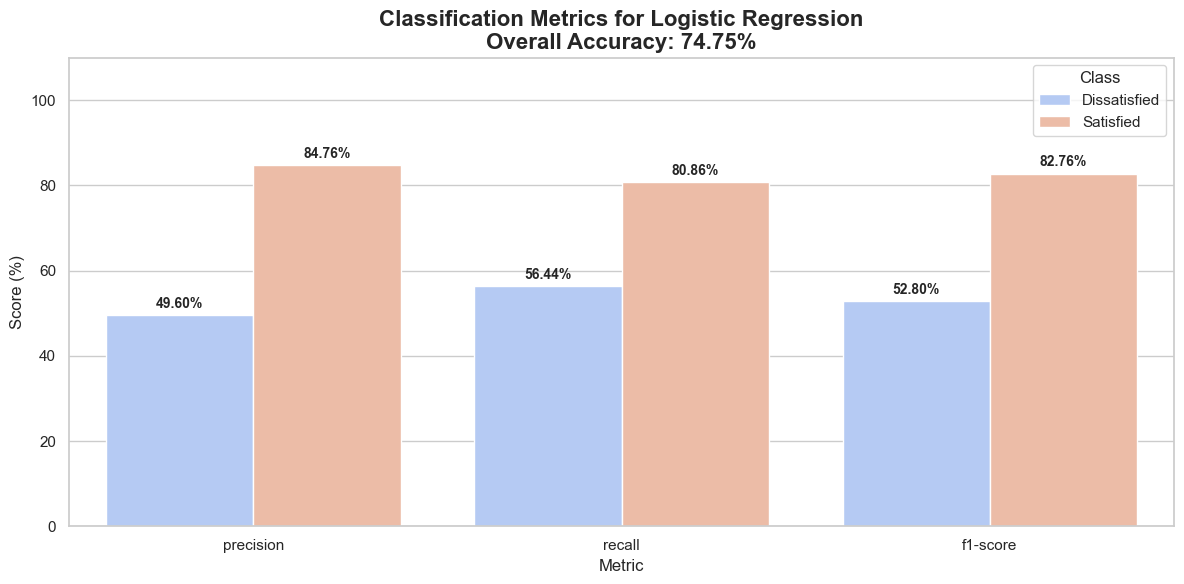

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only the class rows (exclude accuracy, macro avg, etc.)
class_metrics = report_df.loc[['Dissatisfied', 'Satisfied'], ['precision', 'recall', 'f1-score']]

# Reset index for plotting
class_metrics = class_metrics.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
class_metrics.rename(columns={'index': 'Class'}, inplace=True)

# Convert scores to percentage
class_metrics['Score'] = class_metrics['Score'] * 100

# Extract and format accuracy as percentage
accuracy_percent = float(report_df.loc['accuracy', 'precision']) * 100
accuracy_label = f"Overall Accuracy: {accuracy_percent:.2f}%"

# Plot with a different color palette
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=class_metrics, x='Metric', y='Score', hue='Class', palette='coolwarm')

# Add percentage value labels (skip 0.00%)
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # Only annotate if height > 0
        x = bar.get_x() + bar.get_width() / 2
        ax.text(x, height + 1, f'{height:.2f}%', ha='center', va='bottom', fontsize=10, weight='bold')

# Styling
plt.ylim(0, 110)
plt.title('Classification Metrics for Logistic Regression\n' + accuracy_label, fontsize=16, fontweight='bold')
plt.ylabel('Score (%)')
plt.xlabel('Metric')
plt.legend(title='Class')
plt.tight_layout()
plt.show()

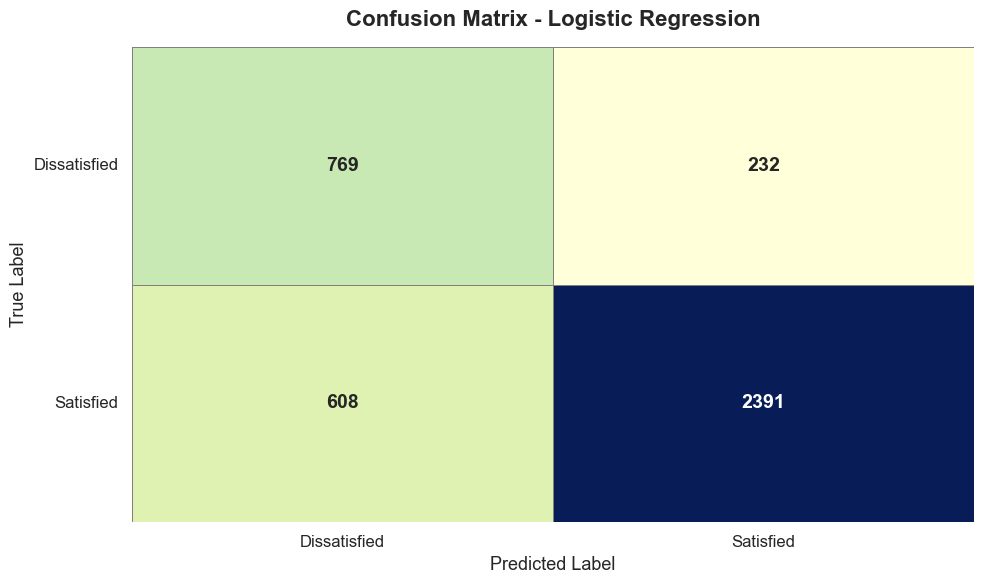

In [17]:
# Step 8: Formatted Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
labels = ['Dissatisfied', 'Satisfied']

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Draw heatmap with enhanced formatting
ax = sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='YlGnBu',
    xticklabels=labels,
    yticklabels=labels,
    cbar=False,
    linewidths=0.5,
    linecolor='gray',
    annot_kws={"size": 14, "weight": "bold"}
)

# Add labels and title with better formatting
plt.title("Confusion Matrix - Logistic Regression", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Predicted Label", fontsize=13)
plt.ylabel("True Label", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()

#### 2. Decision Tree

In [45]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [46]:
# Step 2: Load and Split the Dataset
# Load dataset
dataset = pd.read_csv('scaled_dataset.csv')

# Split into features and target
X = dataset.drop(columns=['Satisfaction_Satisfied'])
y = dataset['Satisfaction_Satisfied']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#### Step 3: Train the Decision Tree Model

In [47]:
# Initialize and train Decision Tree with tuned parameters
dt_model = DecisionTreeClassifier(
    criterion='entropy',         # Use information gain
    max_depth=10,                # Limit depth to prevent overfitting
    min_samples_split=10,        # Require at least 10 samples to split
    min_samples_leaf=5,          # Require at least 5 samples per leaf
    max_features='sqrt',         # Consider sqrt(n_features) at each split
    random_state=42
)

dt_model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [48]:
# Step 4: Make Predictions
y_pred = dt_model.predict(X_test)

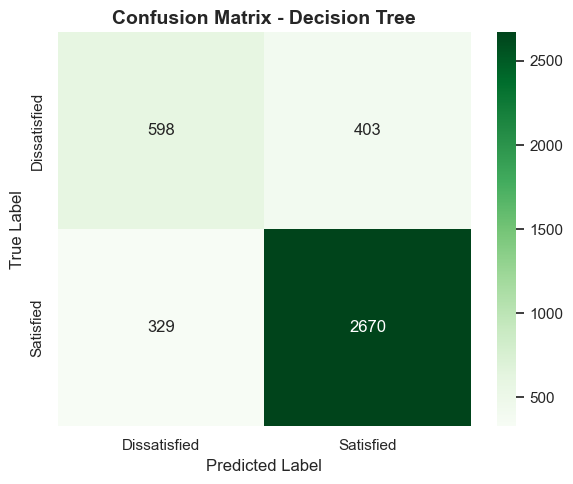

In [49]:
#Step 5: Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
labels = ['Dissatisfied', 'Satisfied']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Decision Tree", fontsize=14, fontweight='bold')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

In [50]:
#Step 6: Classification Report Table
accuracy = accuracy_score(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, target_names=['Dissatisfied', 'Satisfied'], output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report_dict).transpose()
report_df = report_df.round(4)

# Add accuracy as a separate row (under 'precision' column)
report_df.loc['accuracy'] = [accuracy, None, None, None]
print("Decision Tree - Classification Report\n")
print(report_df)

Decision Tree - Classification Report

              precision  recall  f1-score  support
Dissatisfied     0.6451  0.5974    0.6203   1001.0
Satisfied        0.8689  0.8903    0.8794   2999.0
accuracy         0.8170     NaN       NaN      NaN
macro avg        0.7570  0.7438    0.7499   4000.0
weighted avg     0.8129  0.8170    0.8146   4000.0


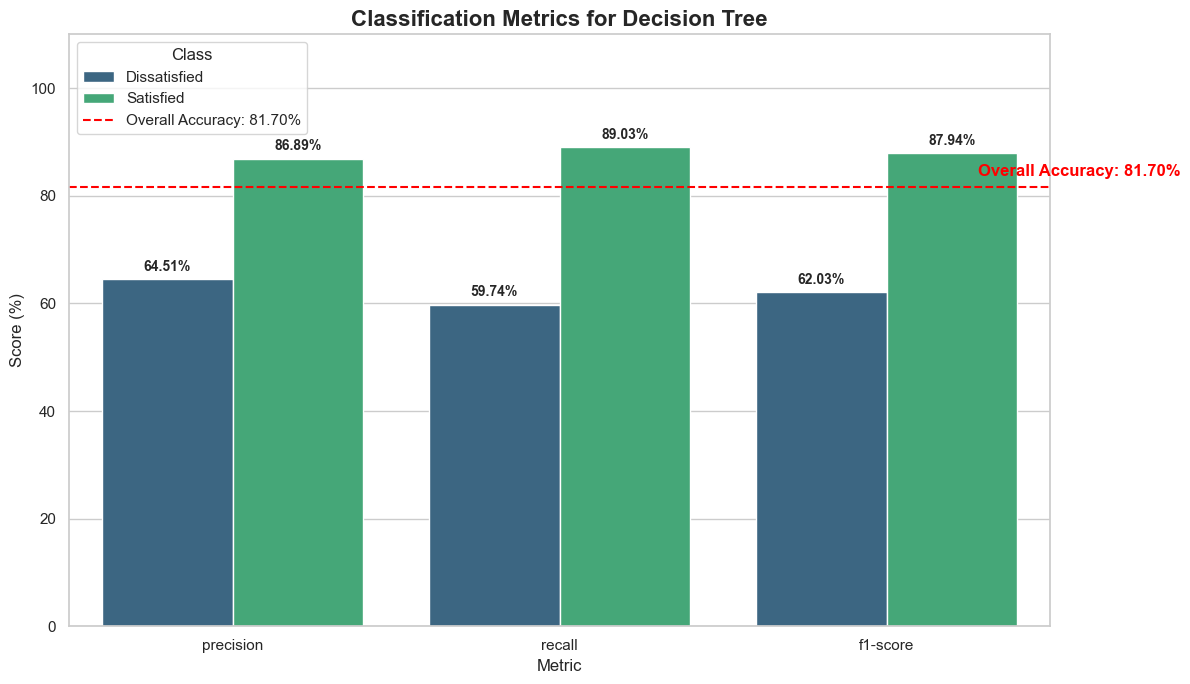

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only class rows (Dissatisfied and Satisfied)
class_metrics = report_df.loc[['Dissatisfied', 'Satisfied'], ['precision', 'recall', 'f1-score']]

# Prepare for plotting
class_metrics = class_metrics.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
class_metrics.rename(columns={'index': 'Class'}, inplace=True)

# Convert scores to percentage
class_metrics['Score'] = class_metrics['Score'] * 100

# Extract accuracy
accuracy_percent = float(report_df.loc['accuracy', 'precision']) * 100
accuracy_label = f"Overall Accuracy: {accuracy_percent:.2f}%"

# Plot
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=class_metrics, x='Metric', y='Score', hue='Class', palette='viridis')

# Add percentage labels to bars
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # Skip 0.00%
        x = bar.get_x() + bar.get_width() / 2
        ax.text(x, height + 1, f'{height:.2f}%', ha='center', va='bottom', fontsize=10, weight='bold')

# Add accuracy line
plt.axhline(accuracy_percent, color='red', linestyle='--', linewidth=1.5, label=accuracy_label)
plt.text(
    x=2.9, y=accuracy_percent + 2,
    s=accuracy_label,
    color='red',
    fontsize=12,
    ha='right',
    fontweight='bold'
)

# Styling
plt.ylim(0, 110)
plt.title('Classification Metrics for Decision Tree', fontsize=16, fontweight='bold')
plt.ylabel('Score (%)')
plt.xlabel('Metric')
plt.legend(title='Class')
plt.tight_layout()
plt.show()


#### 3. Random Forest

In [52]:
# Step 1: Import Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,                 # Number of trees in the forest
    criterion='gini',                 # Function to measure the quality of a split: 'gini' or 'entropy'
    max_depth=None,                  # Max depth of the tree (None means nodes are expanded until all leaves are pure)
    min_samples_split=2,            # Minimum number of samples required to split an internal node
    min_samples_leaf=1,             # Minimum number of samples required to be at a leaf node
    min_weight_fraction_leaf=0.0,   # Minimum weighted fraction of the sum total of weights required to be at a leaf node
    max_features='sqrt',            # Number of features to consider when looking for the best split
    max_leaf_nodes=None,            # Grow trees with max_leaf_nodes in best-first fashion
    min_impurity_decrease=0.0,      # Node will be split if this split induces a decrease of impurity greater than or equal to this value
    bootstrap=True,                 # Whether bootstrap samples are used when building trees
    oob_score=False,                # Whether to use out-of-bag samples to estimate the generalization score
    n_jobs=-1,                      # Number of jobs to run in parallel (-1 means using all processors)
    random_state=42,                # Seed for reproducibility
    verbose=0,                      # Controls the verbosity when fitting and predicting
    warm_start=False,               # Reuse the solution of the previous call to fit and add more estimators to the ensemble
    class_weight='balanced',        # Automatically adjust weights inversely proportional to class frequencies
    ccp_alpha=0.0,                  # Complexity parameter used for Minimal Cost-Complexity Pruning
    max_samples=None                # Number of samples to draw from X to train each base estimator (only if bootstrap=True)
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [65]:
#Step 3: Make Predictions
y_pred = rf_model.predict(X_test)

In [66]:
# Step 4: Generate Classification Report and Accuracy
accuracy = accuracy_score(y_test, y_pred)
report_dict = classification_report(
    y_test, y_pred,
    target_names=['Dissatisfied', 'Satisfied'],
    output_dict=True
)

In [67]:
#Step 5: Convert Report to DataFrame and Add Accuracy
report_df = pd.DataFrame(report_dict).transpose().round(4)
report_df.loc['accuracy'] = [accuracy, None, None, None]
print("Random Forest - Classification Report\n")
print(report_df)

Random Forest - Classification Report

              precision  recall  f1-score  support
Dissatisfied     0.7039  0.5914    0.6428   1001.0
Satisfied        0.8705  0.9170    0.8931   2999.0
accuracy         0.8355     NaN       NaN      NaN
macro avg        0.7872  0.7542    0.7680   4000.0
weighted avg     0.8288  0.8355    0.8305   4000.0


In [68]:
#Step 6: Prepare Data for Visualization
# Filter class-specific metrics only
class_metrics = report_df.loc[['Dissatisfied', 'Satisfied'], ['precision', 'recall', 'f1-score']]

# Reshape for plotting
class_metrics = class_metrics.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
class_metrics.rename(columns={'index': 'Class'}, inplace=True)

# Convert scores to percentage
class_metrics['Score'] = class_metrics['Score'] * 100


In [69]:
#Step 7: Extract Accuracy for Display
accuracy_percent = accuracy * 100
accuracy_label = f"Overall Accuracy: {accuracy_percent:.2f}%"


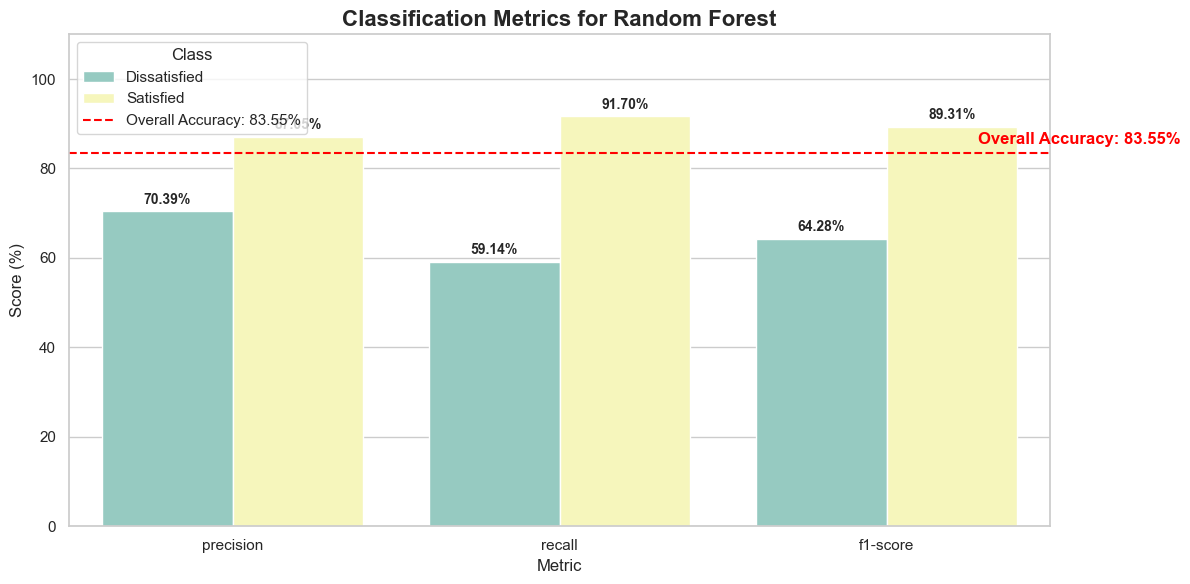

In [ ]:
#Step 8: Plot Classification Metrics
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=class_metrics, x='Metric', y='Score', hue='Class', palette='Set3')
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        x = bar.get_x() + bar.get_width() / 2
        ax.text(x, height + 1, f'{height:.2f}%', ha='center', va='bottom', fontsize=10, weight='bold')
plt.axhline(accuracy_percent, color='red', linestyle='--', linewidth=1.5, label=accuracy_label)
plt.text(
    x=2.9, y=accuracy_percent + 2,
    s=accuracy_label,
    color='red',
    fontsize=12,
    ha='right',
    fontweight='bold'
)

plt.ylim(0, 110)
plt.title('Classification Metrics for Random Forest', fontsize=16, fontweight='bold')
plt.ylabel('Score (%)')
plt.xlabel('Metric')
plt.legend(title='Class')
plt.tight_layout()
plt.show()

#### 4. Support Vector Machine (SVM)

In [71]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [73]:
# Step 2: Load and Prepare the Data
# Assuming X and y are already defined (features and target variable)
X = dataset.drop(columns=['Satisfaction_Satisfied'])  # Replace with your feature columns
y = dataset['Satisfaction_Satisfied']  # Replace with your target variable column


In [ ]:
# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [75]:
# Step 4: Train the Support Vector Machine (SVM) Model
svm_model = SVC(
    C=1.0,                        # Regularization parameter (higher = less regularization)
    kernel='rbf',                 # Kernel type: 'rbf' (radial basis function)
    degree=3,                     # Degree for 'poly' kernel (ignored by other kernels)
    gamma='scale',                # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    coef0=0.0,                    # Independent term in kernel function
    shrinking=True,               # Use shrinking heuristic (faster training)
    probability=True,             # Enable probability estimates
    tol=1e-3,                     # Tolerance for stopping criterion
    cache_size=200,               # Size of kernel cache (in MB)
    class_weight='balanced',      # Handle unbalanced class weights
    verbose=False,                # Disable verbose output
    random_state=42               # Reproducibility
)

# Fit the model to the training data
svm_model.fit(X_train, y_train)


SVC(class_weight='balanced', probability=True, random_state=42)